Xây dựng mạng ANN phân lớp chữ cái viết tay. Khai báo các gói numpy, mnist, keras
https://victorzhou.com/blog/keras-neural-network-tutorial/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist

Lấy dữ liệu từ mnist. Có 2 tập train và test


In [44]:
#@tf.autograph.experimental.do_not_convert
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Có 60000 ảnh train và 10000 ảnh để test

In [5]:
print(test_labels[100])

6


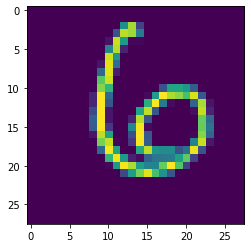

In [4]:
plt.imshow(test_images[100].reshape(28,28))

In [6]:
test_images[100]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 127,
        221,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64, 229,
        219, 104,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13, 235, 140,
          4,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 118, 227,  25,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))


Mạng có 1 lớp vào 784 nút, 2 lớp ẩn mỗi lớp 64 nút, 1 lớp ra 10 nút. Các hàm kích hoạt là relu và softmax

In [8]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

Huấn luyện mạng 

In [12]:
history=model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=32,
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0156 - accuracy: 0.9942
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0142 - accuracy: 0.9953
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0158 - accuracy: 0.9948
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0136 - accuracy: 0.9953
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0122 - accuracy: 0.9959
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0117 - accuracy: 0.9959
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0144 - accuracy: 0.9950
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0093 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0100 - accuracy: 0.9964
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.010

In [53]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


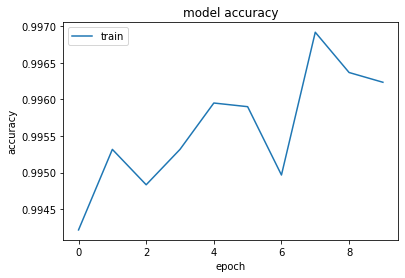

In [13]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

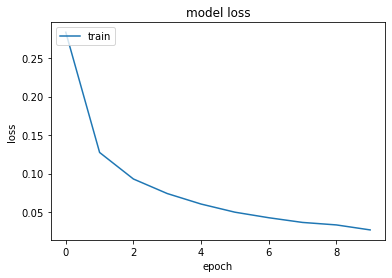

In [55]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 2ms/step - loss: 0.1474 - accuracy: 0.9758


[0.1473737359046936, 0.9757999777793884]

In [15]:
import keras
model.save('model.h5')

In [20]:
print(test_labels[0])

7


In [18]:
kq = model.predict(test_images[:10])
kq

array([[4.50636398e-20, 1.69305979e-14, 2.36424335e-12, 5.85822189e-13,
        1.21982027e-23, 8.80537559e-21, 2.64370524e-26, 1.00000000e+00,
        9.95329755e-17, 8.51732476e-13],
       [4.64916781e-18, 3.23572028e-15, 1.00000000e+00, 5.02365771e-12,
        1.43458369e-29, 1.23644942e-19, 5.80010809e-24, 5.25707153e-27,
        7.41626118e-12, 4.14948528e-24],
       [1.21331349e-17, 9.99950886e-01, 6.18786689e-11, 7.66282925e-15,
        4.89355516e-05, 3.38560679e-10, 6.91242175e-14, 2.56064975e-10,
        8.51713935e-08, 3.36474533e-12],
       [9.99999881e-01, 2.12792312e-14, 2.54579996e-10, 2.45958903e-14,
        2.98333379e-13, 2.48977949e-13, 1.21414303e-07, 3.68803295e-12,
        1.03245483e-17, 9.08485472e-13],
       [3.82004188e-13, 2.48903901e-11, 3.52980976e-07, 5.98686267e-10,
        9.90447044e-01, 8.74146281e-07, 3.28825704e-12, 1.87983721e-06,
        5.23115969e-12, 9.54985712e-03],
       [1.48510676e-19, 9.99999881e-01, 1.74007503e-15, 1.07016843e-18,
   

In [21]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:10])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:10]) # [7, 2, 1, 0, 4]

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


Thử lấy model đã lưu trong model.h5 - không phải đào tạo lại

In [59]:
predictions

array([[1.11103446e-10, 1.27995860e-11, 1.09460518e-09, 4.62749000e-07,
        4.66343164e-13, 1.50273727e-09, 5.03431271e-19, 9.99999523e-01,
        8.35029546e-11, 1.64215280e-10],
       [1.98743452e-12, 7.17955686e-07, 9.99999285e-01, 1.42042116e-11,
        7.95685969e-16, 3.34529252e-13, 7.60042251e-10, 5.76779076e-13,
        2.91440694e-09, 1.05469774e-19],
       [9.61356250e-07, 9.99544799e-01, 1.16442439e-04, 6.62230946e-08,
        2.78430321e-04, 1.86172269e-06, 4.34725553e-06, 2.68498879e-05,
        2.58701384e-05, 3.34939301e-07],
       [9.99990940e-01, 1.57889812e-10, 7.42178509e-06, 2.34453211e-07,
        2.71689424e-11, 4.40088883e-07, 3.07596565e-07, 4.96452692e-08,
        4.28423697e-09, 6.32416061e-07],
       [3.09235233e-08, 9.05174427e-13, 1.38771252e-08, 2.81376367e-10,
        9.99701798e-01, 5.98266381e-10, 3.78980269e-09, 1.39033617e-07,
        2.83797235e-08, 2.98105908e-04],
       [2.72209832e-09, 9.99979019e-01, 3.32929005e-07, 1.24192198e-10,
   

In [22]:
# Load the model's saved weights.
#model1= model.load_weights('model.h5')

model1= keras.models.load_model('model.h5')


In [23]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
#@tf.autograph.experimental.do_not_convert
# Predict on the first 5 test images.
predictions = model1.predict(test_images[:20])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:20]) # [7, 2, 1, 0, 4]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
